# 3.1: Interpolation and Lagrange Polynomial

In [1]:
import numpy as np
from math import factorial, pi
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
x = np.linspace(-pi,pi,10)
print(x)
x[-1]

[-3.14159265 -2.44346095 -1.74532925 -1.04719755 -0.34906585  0.34906585
  1.04719755  1.74532925  2.44346095  3.14159265]


3.141592653589793

In [3]:
x = np.linspace(-pi,pi,100)
pSin = np.zeros([5,100])
pSin[0,:] = x
for n in range(1,5):
    pSin[n,:] = pSin[n-1,:] + (-1)**n/factorial(2*n+1)*x**(2*n+1)

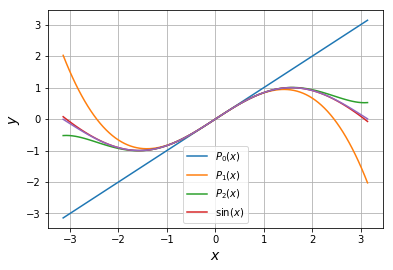

In [4]:
for n in range(0,5):
    plt.plot(x,pSin[n,:])
plt.legend(["$P_0(x)$","$P_1(x)$","$P_2(x)$","$\sin(x)$"])
plt.xlabel("$x$",fontsize=14)
plt.ylabel("$y$",fontsize=14)
plt.grid()

In [5]:
x = np.linspace(-1,3,100)
pExp = np.zeros([5,100])
pExp[0,:] = 1
for n in range(1,5):
    pExp[n,:] = pExp[n-1,:] + 1/factorial(n)*x**(n)

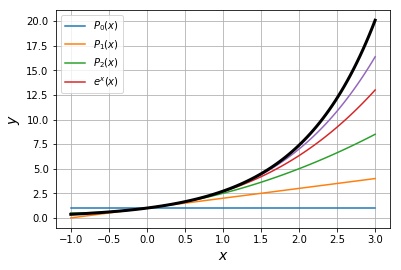

In [6]:
for n in range(0,5):
    plt.plot(x,pExp[n,:])
plt.plot(x,np.exp(x),'k',linewidth=3)
plt.legend(["$P_0(x)$","$P_1(x)$","$P_2(x)$","$e^x(x)$"])
plt.xlabel("$x$",fontsize=14)
plt.ylabel("$y$",fontsize=14)
plt.grid()

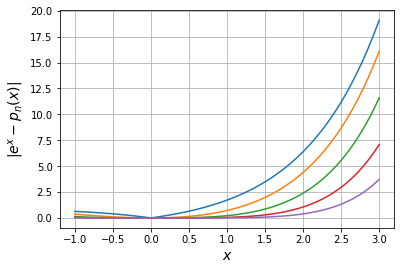

In [7]:
for n in range(0,5):
    plt.plot(x,abs(np.exp(x)-pExp[n,:]))
plt.xlabel("$x$",fontsize=14)
plt.ylabel("$|e^x - p_n(x)|$",fontsize=14)

plt.grid()

## Example: $f(x) = x^{-1}$ near $x = 1$

  n  |  P_n(3) 
  0  |    1
  1  |   -1
  2  |    3
  3  |   -5
  4  |   11
  5  |  -21
  6  |   43


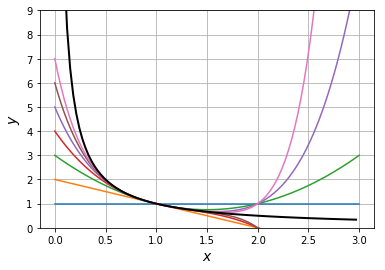

In [8]:
x = np.linspace(0,3,100)
pInv = np.zeros([7,100])
pInv[0,:] = np.ones([1,100])
plt.plot(x,pInv[0,:])
for n in range(1,7):
    pInv[n,:] = pInv[n-1] + (-1)**(n)*(x-1)**n
    plt.plot(x,pInv[n,:])
plt.plot(x[1:-1],1/x[1:-1],'k',linewidth=2)
plt.xlabel("$x$",fontsize=14)
plt.ylabel("$y$",fontsize=14)
plt.ylim([0,9])
plt.grid()


print("  n  |  P_n(3) ")
print("===============")
for n in range(0,7):
    print("% 3d  |  % 3d" % (n,pInv[n,-1]))
    

##  Lagrange Interpolation

In [29]:
def L(xvals,kk,x):
    lval = 1;
    n = xvals.size
    for ii in range(0,n):
        if ii != kk:
            lval *= (x-xvals[ii])/(xvals[kk]-xvals[ii])
    return lval


In [30]:
def p_Lagrange(xvals,yvals,x):
    n = yvals.size
    pLagrange = 0
    for kk in range(0,n):
        pLagrange += yvals[kk]*L(xvals,kk,x)
    return pLagrange

### Example 1

Consider the following set of data: $$\left\lbrace (-9,5), (-4, 2), (-1,-2), (7,9)\right\rbrace$$  Using the 

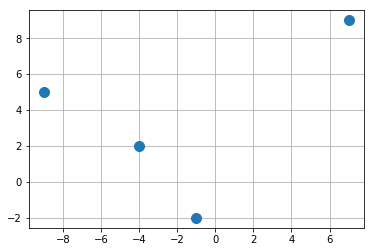

In [31]:
xvals = np.array([-9.,-4.,-1.,7.])
yvals = np.array([5.,2.,-2.,9.])
plt.plot(xvals,yvals,'o',markersize=10)
plt.grid()

-3.2371537997159088

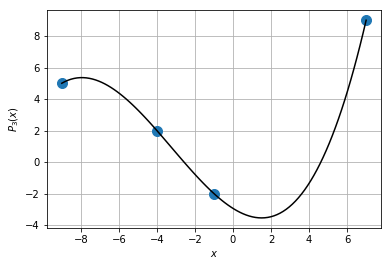

In [32]:
x = np.linspace(min(xvals),max(xvals),int(1e2))
y = p_Lagrange(xvals,yvals,x)

plt.plot(xvals,yvals,'o',markersize=10)
plt.plot(x,y,color='k')
plt.xlabel('$x$')
plt.ylabel("$P_{3}(x)$")
plt.grid()

p_Lagrange(xvals,yvals,.45)


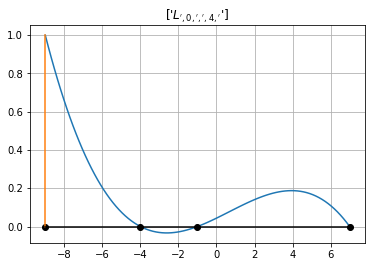

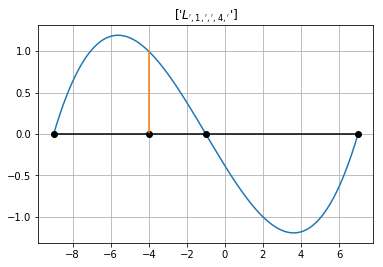

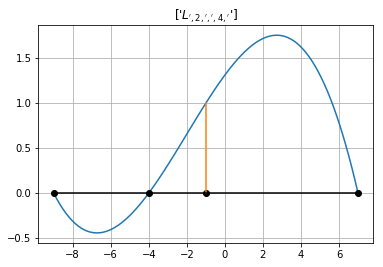

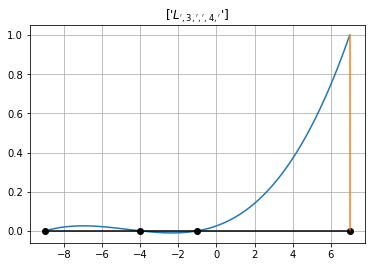

In [28]:
for kk in range(0,xvals.size):
    plt.figure()
    p = L(xvals,kk,x);
    p = p;
    plt.plot(x,p)
    plt.plot(xvals,yvals*0,'ko')
    plt.plot(xvals[kk]*np.array([1,1]),np.array([0,L(xvals,kk,xvals[kk])]))
    plt.plot(x,0*x,'k')
    plt.title(["$L_{",kk,",",xvals.size,"}$"])
    plt.grid()


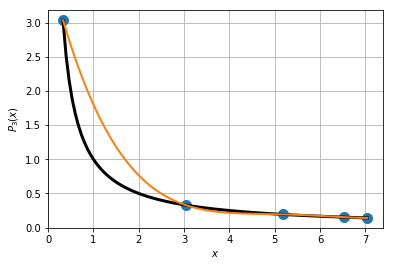

In [173]:
xvals = np.random.rand(5)*10
yvals = 1/xvals

x = np.linspace(min(xvals),max(xvals),int(1e2))
y = p_Lagrange(xvals,yvals,x)
ytrue = 1/x

plt.plot(xvals,yvals,'o',markersize=10)
plt.plot(x,ytrue,'k',linewidth=3)
plt.plot(x,y,linewidth=2)
plt.xlabel('$x$')
plt.ylabel("$P_{3}(x)$")
plt.grid()

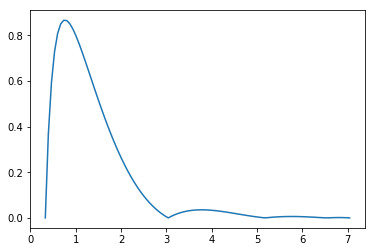

In [175]:
plt.plot(x,np.abs(y - ytrue))